# Predicting Housing Prices with Advanced Regression

### A Kaggle Competition

### 📃 The Problem

The goal of this project it to predict the sales price for each house in the provided data.

[**Competition Link**](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)

### 👩‍💻 The Approach

My initial approach will be to:
- Understand the data (*what variables are in the data set?*)
- Identify any missing, incomplete or invalid data
- Visualise the data to get an understanding of the relationship between variables
- Idenitfy the most appropriate model to use to solve the problem (*predicting housing prices*)
- Train selected model
- Evaluate and Improve Model where required
- Prepare a version for deployment



### 📚 Libraries

In [63]:
import os
# from kaggle.api.kaggle_api_extended import KaggleApi
from zipfile import ZipFile
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


### 🔠 The Data

In [112]:
api = KaggleApi()
api.authenticate()

In [113]:
api.competition_download_files('house-prices-advanced-regression-techniques')

In [114]:
zf = ZipFile('house-prices-advanced-regression-techniques.zip')
zf.extractall('data/')
zf.close()

In [115]:
os.remove('house-prices-advanced-regression-techniques.zip')

In [120]:
test_data = pd.read_csv('data/test.csv')
train_data = pd.read_csv('data/train.csv')

In [121]:
print(test_data.shape)
print(train_data.shape)

(1459, 80)
(1460, 81)


In [122]:
print(f"There are {len(test_data.columns)-1} different features for us to explore and they are: {test_data.columns[1:]}")

There are 79 different features for us to explore and they are: Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'G

In [123]:
test_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [124]:
test_data.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


### Dealing with missing values

Initially i can see in there are many columns with missing data.

In [125]:
null_columns = test_data.columns[test_data.isnull().any()]
null_counts = test_data[null_columns].isnull().sum()
print(null_counts)
# here we can see that there are some columns that have large amounts of 
# missing values

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64


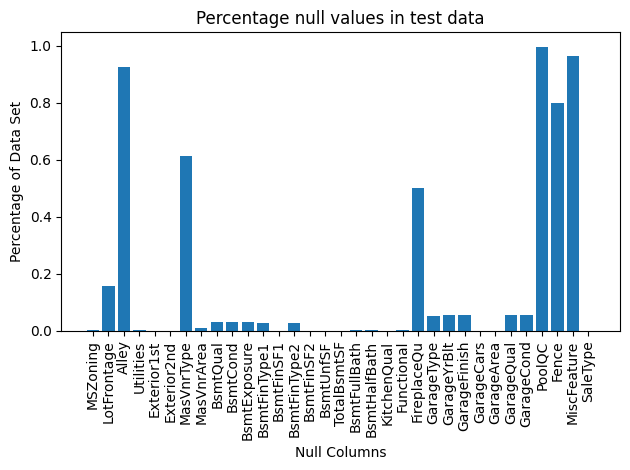

In [126]:
# convert null counts to dictionary and divide by len of df to get % of null values
null_counts_dict = (null_counts/len(test_data)).to_dict()

# Extract data into list
columns = list(null_counts_dict.keys())
values = list(null_counts_dict.values())

# create histogram
plt.bar(columns,values)
plt.xlabel('Null Columns')
plt.ylabel('Percentage of Data Set')
plt.title('Percentage null values in test data')
plt.xticks(rotation=90) 

plt.tight_layout()
plt.show()

From the above graph we can see that immediately we can drop some columns as they have a significantly large amount of missing data. For this project i will remove anything higher than 20% of data missing.

In [127]:
col_to_drop =[]

for k,v in null_counts_dict.items():
    if v > 0.2:
        col_to_drop.append(k)

print(col_to_drop)

test_data = test_data.drop(columns =col_to_drop)

['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


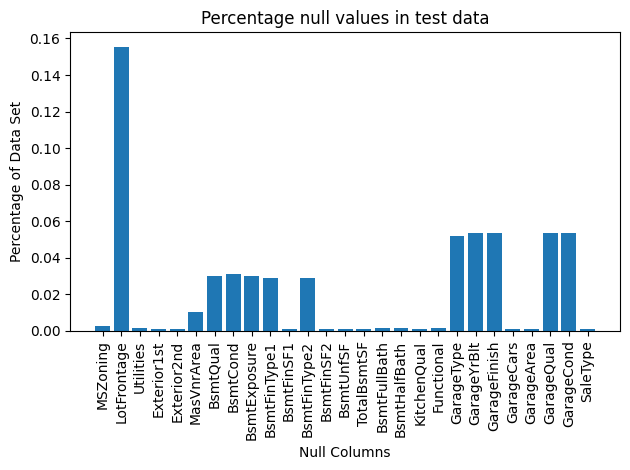

In [128]:
null_columns = test_data.columns[test_data.isnull().any()]
null_counts = test_data[null_columns].isnull().sum()

# convert null counts to dictionary and divide by len of df to get % of null values
null_counts_dict = (null_counts/len(test_data)).to_dict()

# Extract data into list
columns = list(null_counts_dict.keys())
values = list(null_counts_dict.values())

# create histogram
plt.bar(columns,values)
plt.xlabel('Null Columns')
plt.ylabel('Percentage of Data Set')
plt.title('Percentage null values in test data')
plt.xticks(rotation=90) 

plt.tight_layout()
plt.show()


Now we have the above columns to address, in this instance i will be referring to the documentation about the data set to decide how i should impute the missing values

**Starting with MSZoning**

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

Imputation method: most common

In [129]:
# pandas value_counts outputs to descending order
test_data['MSZoning'].fillna(test_data['MSZoning'].value_counts().keys().tolist()[0],inplace= True)

print(f"Confirming there are {test_data['MSZoning'].isnull().sum()} null values for MSZoning")


Confirming there are 0 null values for MSZoning


**LotFrontage**

LotFrontage: Linear feet of street connected to property

Imputation method: mean

In [130]:
test_data['LotFrontage'].fillna(test_data['LotFrontage'].mean(),inplace=True)

print(f"Confirming there are {test_data['LotFrontage'].isnull().sum()} null values for LotFrontage")

Confirming there are 0 null values for LotFrontage


**Utilities**

Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

Imputation method:most common

In [131]:
test_data['Utilities'].fillna(test_data['Utilities'].value_counts().keys().tolist()[0],inplace= True)

print(f"Confirming there are {test_data['Utilities'].isnull().sum()} null values for Utilities")

Confirming there are 0 null values for Utilities


**MasVnrArea**

MasVnrArea: Masonry veneer area in square feet

Imputation method: mean

In [132]:
test_data['MasVnrArea'].fillna(test_data['MasVnrArea'].mean(),inplace=True)

print(f"Confirming there are {test_data['MasVnrArea'].isnull().sum()} null values for MasVnrArea")

Confirming there are 0 null values for MasVnrArea


**BsmtQual**

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

Imputation method: most common

In [133]:
test_data['BsmtQual'].fillna(test_data['BsmtQual'].value_counts().keys().tolist()[0],inplace= True)

print(f"Confirming there are {test_data['BsmtQual'].isnull().sum()} null values for BsmtQual")

Confirming there are 0 null values for BsmtQual


**BsmtCond**

BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

Imputation method: most common

In [134]:
test_data['BsmtCond'].fillna(test_data['BsmtCond'].value_counts().keys().tolist()[0],inplace= True)

print(f"Confirming there are {test_data['BsmtCond'].isnull().sum()} null values for BsmtCond")

Confirming there are 0 null values for BsmtCond


**BsmtExposure**

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

Imputation method: most common

In [135]:
test_data['BsmtExposure'].fillna(test_data['BsmtExposure'].value_counts().keys().tolist()[0],inplace= True)

print(f"Confirming there are {test_data['BsmtExposure'].isnull().sum()} null values for BsmtExposure")

Confirming there are 0 null values for BsmtExposure


**BsmtFinType1**

BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

Imputation method: most common

In [136]:

test_data['BsmtFinType1'].fillna(test_data['BsmtFinType1'].value_counts().keys().tolist()[0],inplace= True)

print(f"Confirming there are {test_data['BsmtFinType1'].isnull().sum()} null values for BsmtFinType1")

Confirming there are 0 null values for BsmtFinType1


**BsmtFinType2**

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

Imputation: most common

In [137]:
test_data['BsmtFinType2'].fillna(test_data['BsmtFinType2'].value_counts().keys().tolist()[0],inplace= True)

print(f"Confirming there are {test_data['BsmtFinType2'].isnull().sum()} null values for BsmtFinType2")

Confirming there are 0 null values for BsmtFinType2


**GarageType**

GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

Imputation: most common

In [138]:
test_data['GarageType'].fillna(test_data['GarageType'].value_counts().keys().tolist()[0],inplace= True)

print(f"Confirming there are {test_data['GarageType'].isnull().sum()} null values for GarageType")

Confirming there are 0 null values for GarageType


**GarageFinish**

GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

Imputation: most common

In [139]:
test_data['GarageFinish'].fillna(test_data['GarageFinish'].value_counts().keys().tolist()[0],inplace= True)

print(f"Confirming there are {test_data['GarageFinish'].isnull().sum()} null values for GarageFinish")

Confirming there are 0 null values for GarageFinish


**GarageQual**

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

Imputation: most common

In [140]:
test_data['GarageQual'].fillna(test_data['GarageQual'].value_counts().keys().tolist()[0],inplace= True)

print(f"Confirming there are {test_data['GarageQual'].isnull().sum()} null values for GarageQual")

Confirming there are 0 null values for GarageQual


**GarageCond**

GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

Imputation: most common

In [141]:
test_data['GarageCond'].fillna(test_data['GarageCond'].value_counts().keys().tolist()[0],inplace= True)

print(f"Confirming there are {test_data['GarageCond'].isnull().sum()} null values for GarageCond")

Confirming there are 0 null values for GarageCond


**GarageYrBlt**

GarageYrBlt: Year garage was built

imputation method: default to year built for property

In [142]:
test_data['GarageYrBlt'].fillna(test_data['YearBuilt'],inplace= True)

print(f"Confirming there are {test_data['GarageYrBlt'].isnull().sum()} null values for GarageYrBlt")

Confirming there are 0 null values for GarageYrBlt


Now lets check our progress below. It seems there are only a few missing values left

I am going to check the number of rows this has, to see if its appropriate to drop these rows

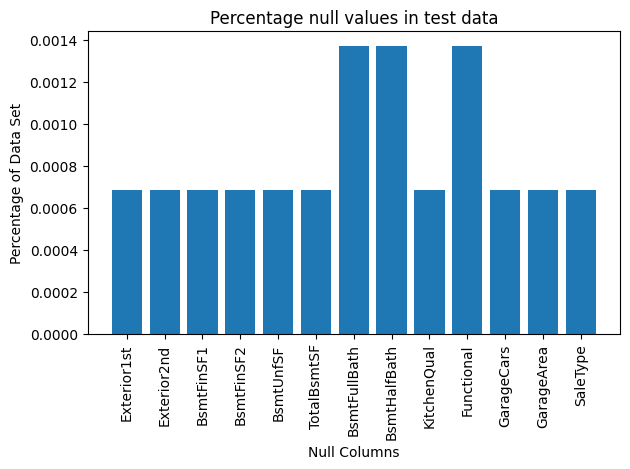

In [143]:
null_columns = test_data.columns[test_data.isnull().any()]
null_counts = test_data[null_columns].isnull().sum()

# convert null counts to dictionary and divide by len of df to get % of null values
null_counts_dict = (null_counts/len(test_data)).to_dict()

# Extract data into list
columns = list(null_counts_dict.keys())
values = list(null_counts_dict.values())

# create histogram
plt.bar(columns,values)
plt.xlabel('Null Columns')
plt.ylabel('Percentage of Data Set')
plt.title('Percentage null values in test data')
plt.xticks(rotation=90) 

plt.tight_layout()
plt.show()

In [144]:
test_data[test_data.isnull().any(axis=1)].shape[0]
print(f"There are only {test_data[test_data.isnull().any(axis=1)].shape[0]} rows that have null values, this represents {test_data[test_data.isnull().any(axis=1)].shape[0]/len(test_data)}% of the dataset")

There are only 8 rows that have null values, this represents 0.0054832076764907475% of the dataset


In [145]:
test_data.dropna(inplace=True)
print(test_data.shape)

(1451, 74)


#### Secondly i will start by identifying outliers

to start i will seperate numerical data from categorical

Then i will use scipy.stats.zscore to identify outliers with a z-score greater than 3


In [146]:
numerical_data = test_data.select_dtypes(include=['number']).columns
cat_data = test_data.select_dtypes(exclude=['number']).columns

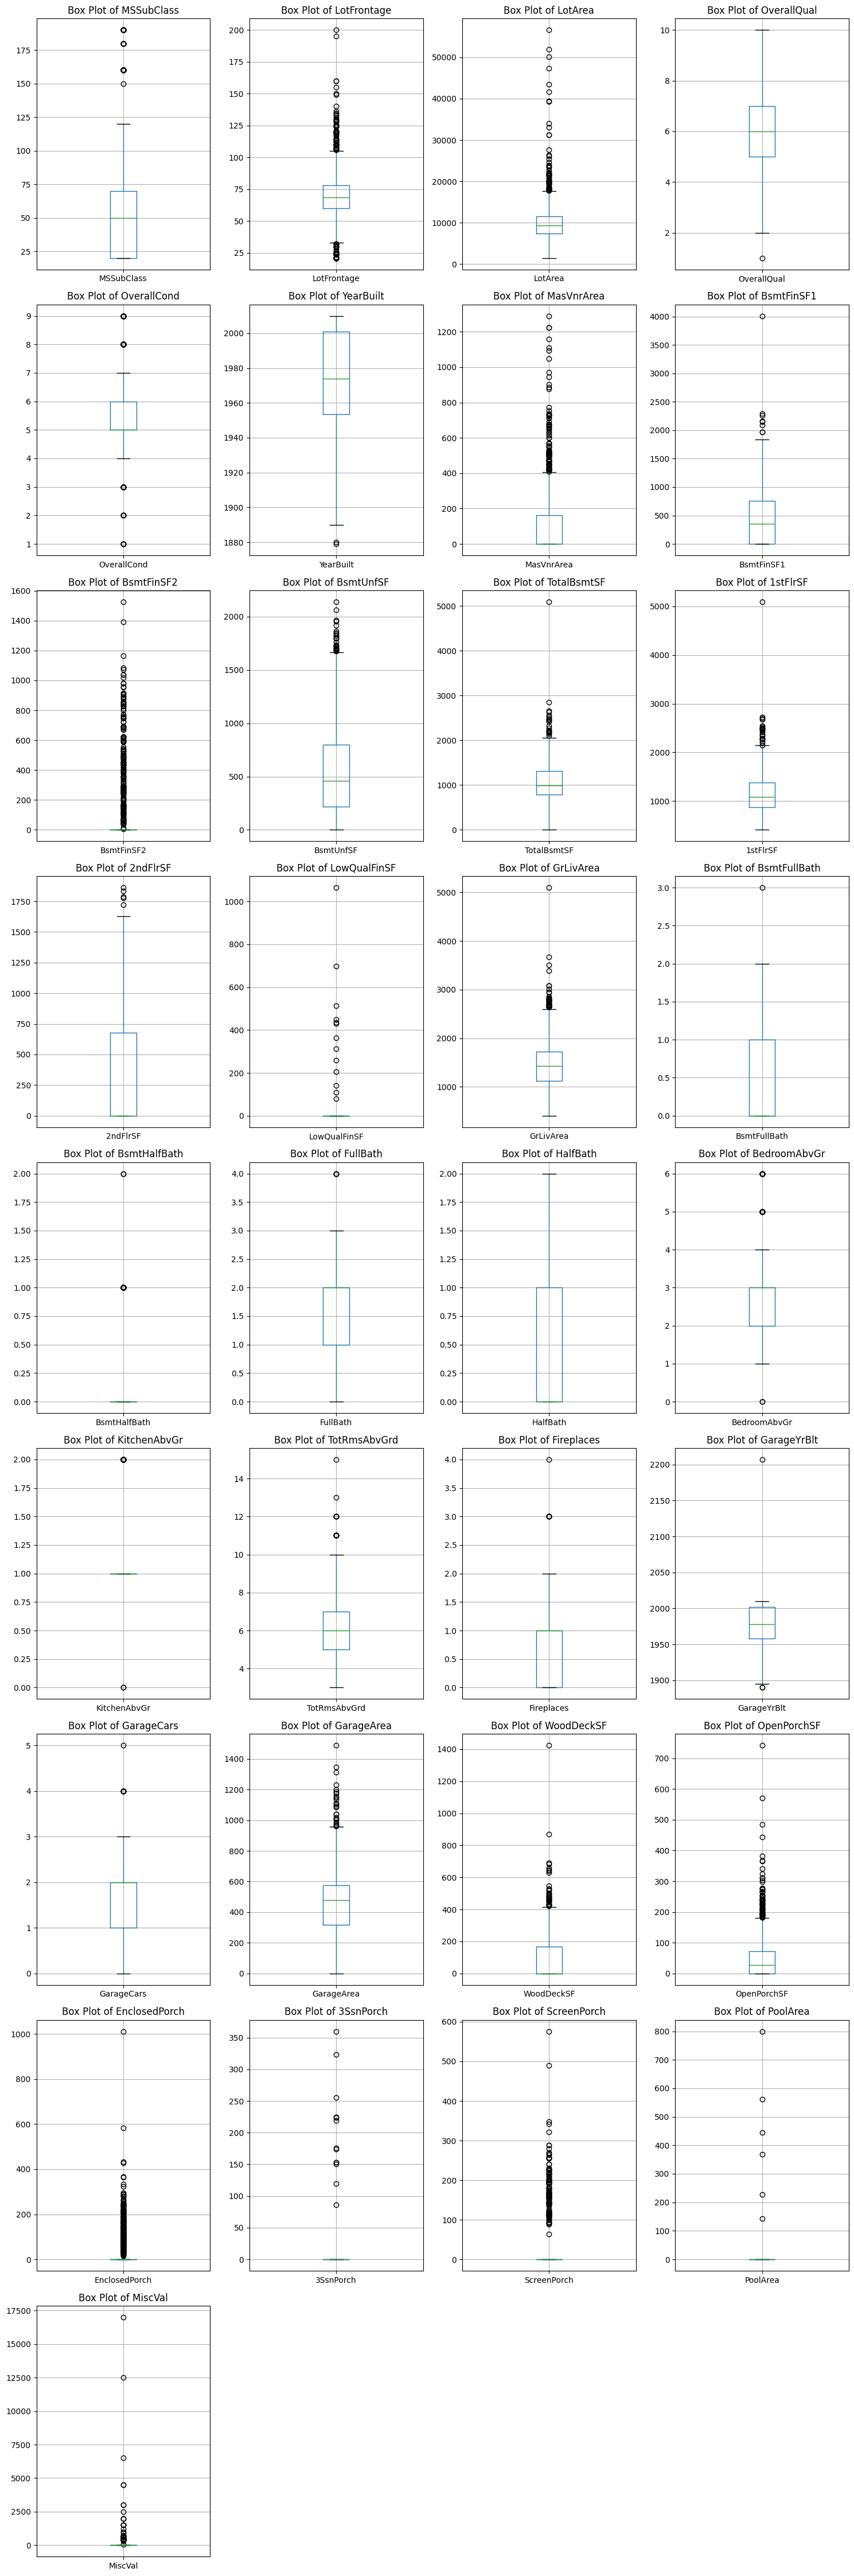

In [147]:

# First to get all numerical columns from the data that have outliers (abs(zscore)>=3)
outlier_cols =[]
for col in numerical_data:
    zscores = stats.zscore(test_data[col])
    if any(abs(x) >= 3 for x in zscores):
        outlier_cols.append(col)

# This code defines a grid to add box plots to
num_plots = len(outlier_cols)
num_cols =4
num_rows = (num_plots//num_cols)+1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

axes = axes.flatten()

# this iterates through out outlier columns and plots them in a grid
for i, col in enumerate(outlier_cols):  
    ax = axes[i]
    test_data.boxplot(column=col, ax=ax)
    ax.set_title(f'Box Plot of {col}')

# this loop compares the number of plots with the size of the grid and removes the empty plots
if num_plots % num_cols != 0:
    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[i])

plt.tight_layout()

plt.show()

I was ideally hoping that seperating numeric and non-numeric data would split categorical data but looking at the data visualised it appears there are variables such as *MSSubClass* which are categorical. 

There is also attributes such as *PoolArea* which is interesting because a large majority of homes have no pool resulting in the significant outliers, this variable perhaps could be treated categorically as:
- no pool
- small pool
- medium pool
- large pool

It appears that the only way forward is to go through the *data_description.txt* and validate the data types into a list. I can't see another way with comparing this description file with the training data set, i know we can use K-means clustering here, however i think it would only be usefule on numeric variables as there is no meaning in the different values for *MSSubClass* and so similar identifiers could be grouped together.

I will categorise them into numerical and categorical data after reviewing this description file


After this we can look at either categorising some numerical attributes like *PoolArea* or we applying some normalisation techniques


In [10]:
cat_col= test_data[[
        'MSSubClass'
        ,'MSZoning'
        ,'Street'
        ,'Alley'
        ,'LotShape'
        ,'LandContour'
        ,'Utilities'
        ,'LotConfig'
        ,'LandSlope'
        ,'Neighborhood'
        ,'Condition1'
        ,'Condition2'
        ,'BldgType'
        ,'HouseStyle'
        ,'OverallQual'
        ,'OverallCond'
        ,'RoofStyle'
        ,'RoofMatl'
        ,'MasVnrType'
        ,'ExterQual'
        ,'ExterCond'
        ,'Foundation'
        ,'BsmtQual' #check na condition
        ,'BsmtCond'
        ,'BsmtExposure'
        ,'BsmtFinType1'
        ,'BsmtFinType2'
        ,'Heating'
        ,'HeatingQC'
        ,'CentralAir'
        ,'Electrical'
        ,'KitchenQual'
        ,'Functional'
        ,'FireplaceQu' #- check n/a
        ,'GarageType'
        ,'GarageFinish'
        ,'GarageQual'
        ,'GarageCond'
        ,'PavedDrive'
        ,'PoolQC'
        ,'Fence'
        ,'MiscFeature'
        ,'SaleType'
        ,'SaleCondition'
        ,'Exterior1st'
        ,'Exterior2nd'
       
        ]]

In [26]:
num_col= test_data[[
        'LotFrontage'
        ,'LotArea'
        ,'BsmtFinSF1'
        ,'BsmtFinSF2'
        ,'BsmtUnfSF' # basement might be able to be aggregated into one col
        ,'TotalBsmtSF'
        ,'1stFlrSF'
        ,'2ndFlrSF'
        ,'LowQualFinSF'
        ,'GrLivArea'
        ,'BsmtFullBath'
        ,'BsmtHalfBath'
        ,'FullBath'
        ,'HalfBath'
        ,'BedroomAbvGr'
        ,'KitchenAbvGr'
        ,'TotRmsAbvGrd'
        ,'GarageCars'
        ,'GarageArea'
        ,'WoodDeckSF'
        ,'OpenPorchSF'
        ,'EnclosedPorch'
        ,'3SsnPorch'
        ,'ScreenPorch'
        ,'PoolArea'
        ,'MiscVal'
        ,'LotFrontage'
        ,'YearBuilt'
        ,'YearRemodAdd'
        ,'GarageYrBlt'
        ,'YrSold'
        ,'MoSold'
        ,'MasVnrArea'
       

        
        ]]

In [12]:
print(f'The test df shape is {test_data.shape} and the categorical dataset is {cat_col.shape} and the numerical data set is {num_col.shape}, The extra column is the ID in both sets')

The test df shape is (1459, 80) and the categorical dataset is (1459, 46) and the numerical data set is (1459, 33), The extra column is the ID in both sets


### Addressing Numerical Data First

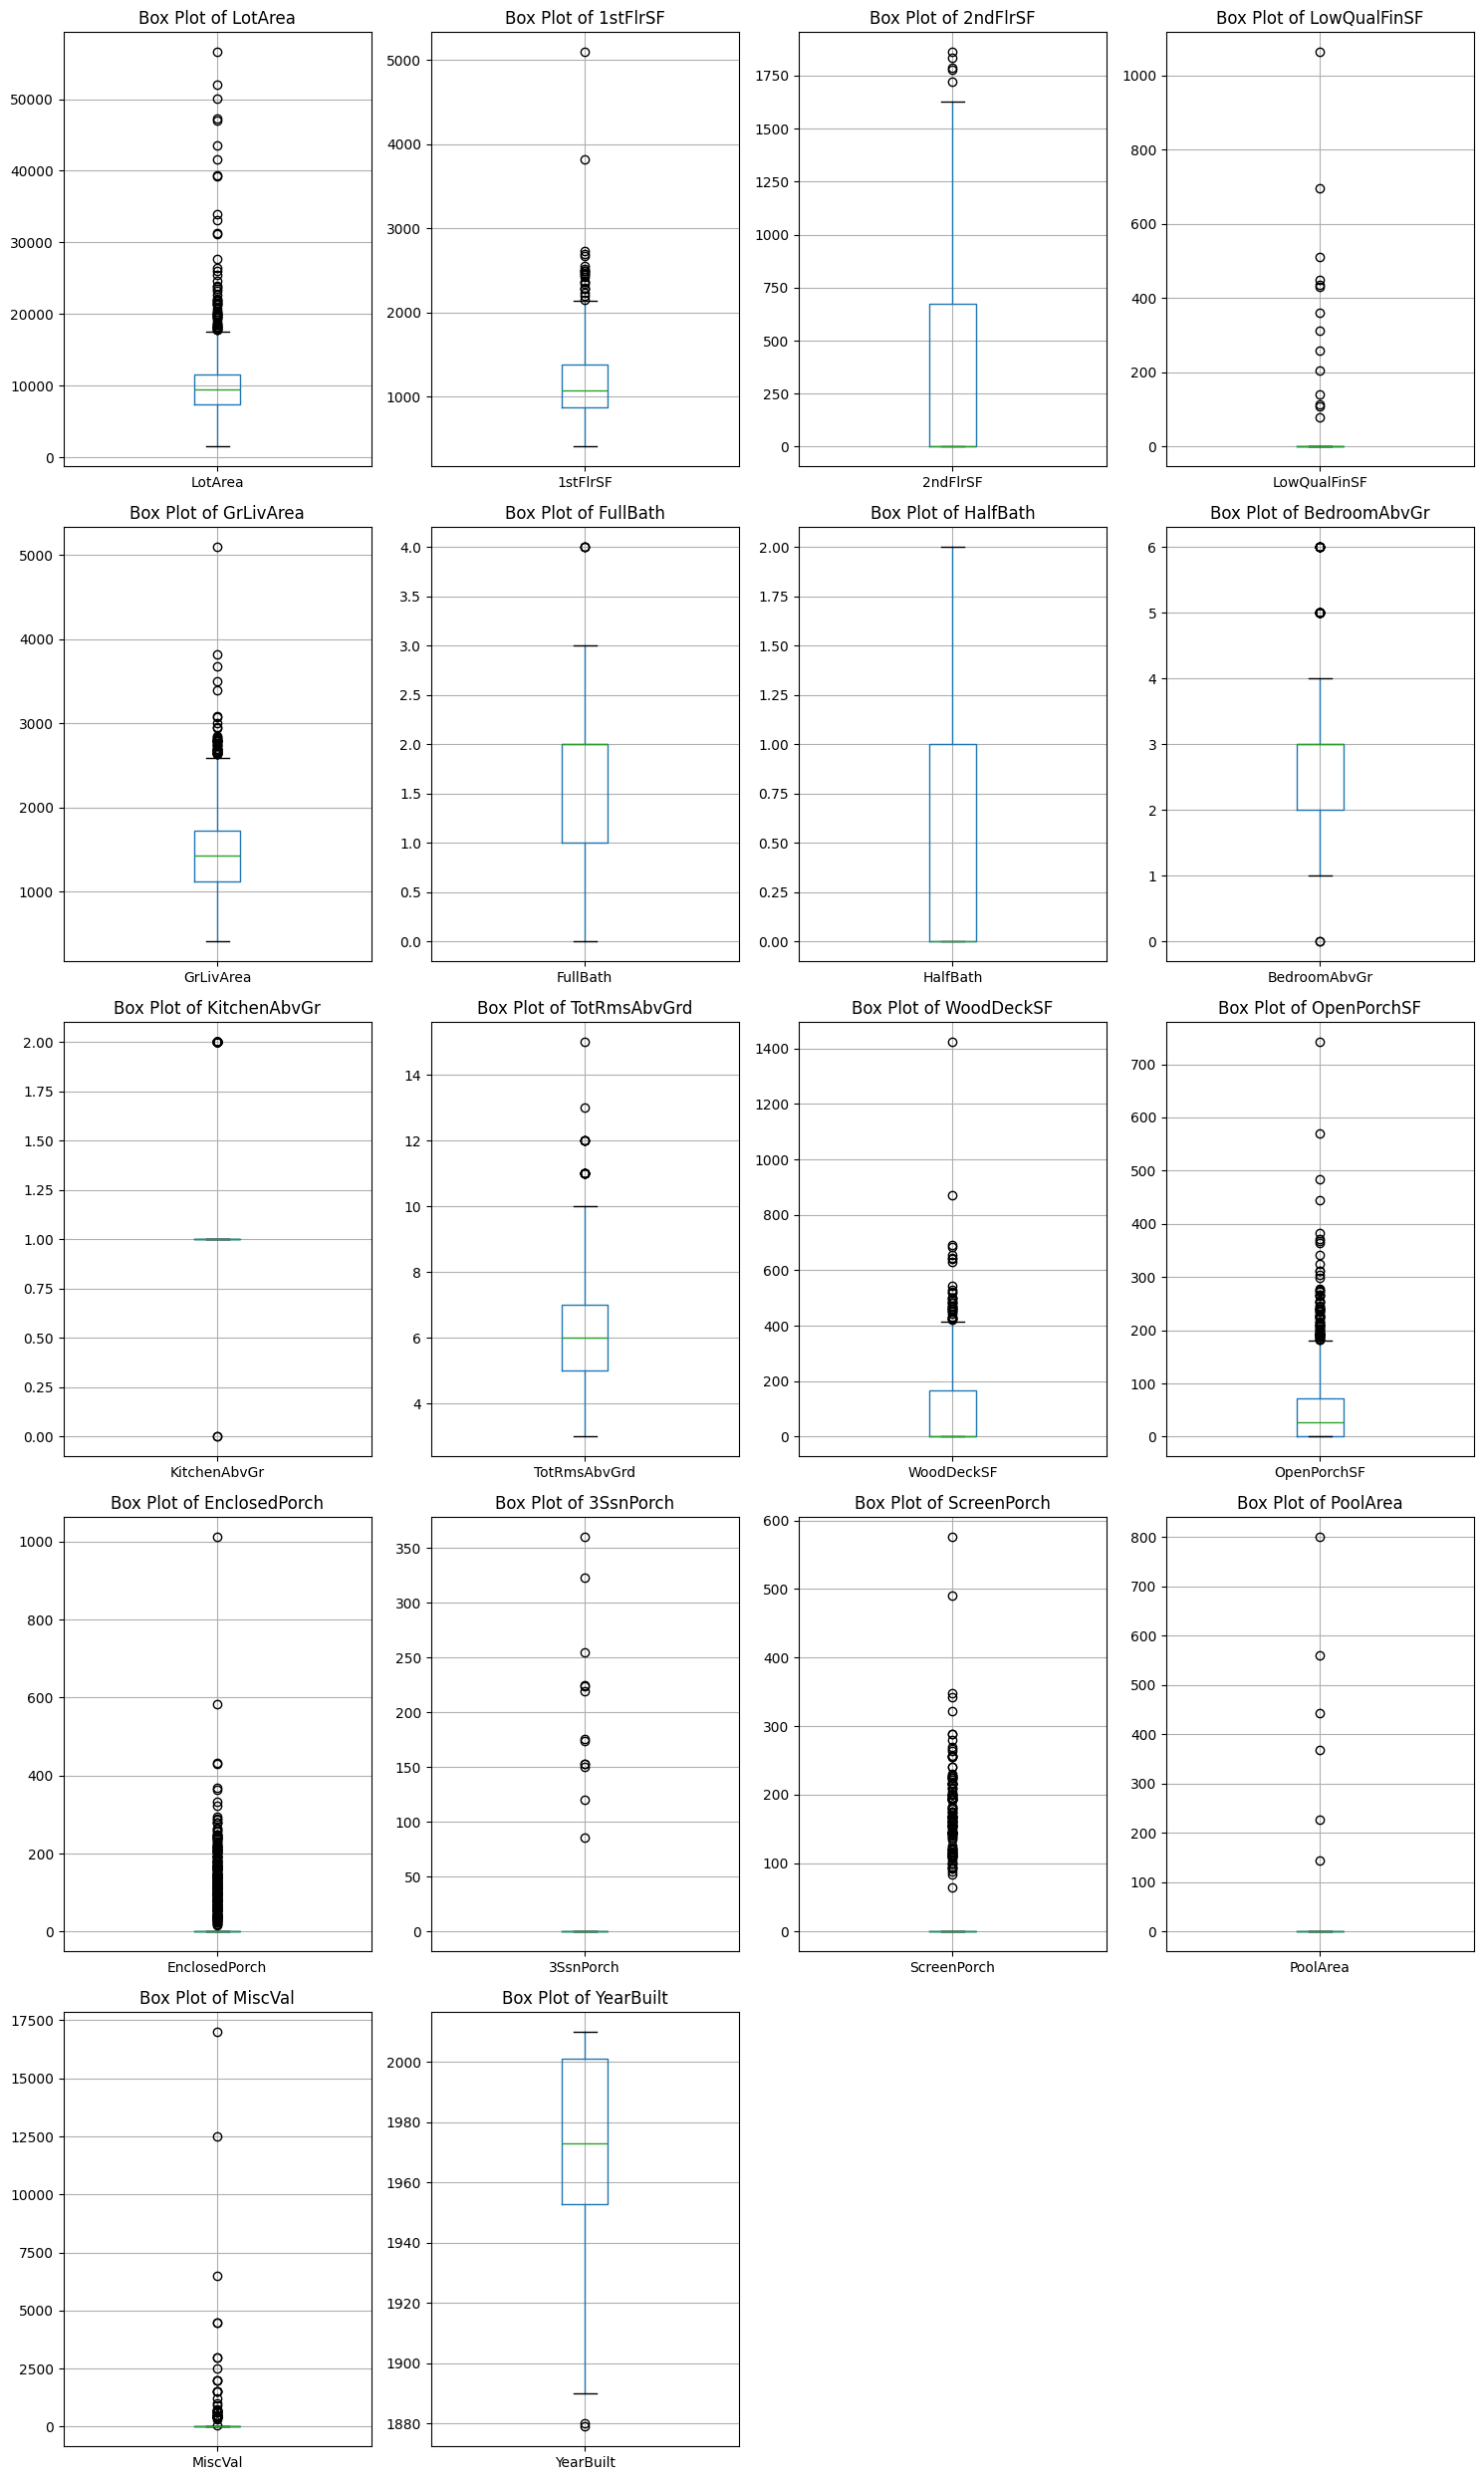

In [13]:
outlier_cols =[]
for col in num_col.columns:
    zscores = stats.zscore(test_data[col])
    if any(abs(x) >= 3 for x in zscores):
        outlier_cols.append(col)

# This code defines a grid to add box plots to
num_plots = len(outlier_cols)
num_cols =4
num_rows = (num_plots//num_cols)+1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

axes = axes.flatten()

# this iterates through out outlier columns and plots them in a grid
for i, col in enumerate(outlier_cols):  
    ax = axes[i]
    test_data.boxplot(column=col, ax=ax)
    ax.set_title(f'Box Plot of {col}')

# this loop compares the number of plots with the size of the grid and removes the empty plots
if num_plots % num_cols != 0:
    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[i])

plt.tight_layout()

plt.show()

This is an improvement, however i beleive it would be optimal to apply categories to some of the numeric data, such a *poolArea*


Lets test this idea for *poolArea*

### 🧽 Dealing with NaN values

Before i deal with outliers completely i need to address the NaN values in the data set.

For numerical values potentially using the Median would be ideal as a lot of numerical data is skewed and as such can result in incorrect information. For example *PoolArea* would have a mean higher than 0 however it would be safer to assume these properties do not have pool.


In [51]:
# num_col[num_col.columns[num_col.isna().any()]].shape

num_col.isna().columns

Index(['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'LotFrontage', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'MoSold', 'MasVnrArea'],
      dtype='object')

In [40]:
from sklearn.impute import SimpleImputer
import numpy as np

In [49]:
imp = SimpleImputer(missing_values=False, strategy='most_frequent')

imputed_num_col = imp.fit_transform(num_col)

ValueError: Input X contains NaN.
SimpleImputer does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [44]:
imputed_df_num =pd.DataFrame(imputed_num_col, columns= num_col.columns)

In [56]:
num_col.columns[num_col.isna().any()].tolist()

['LotFrontage',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageCars',
 'GarageArea',
 'LotFrontage',
 'GarageYrBlt',
 'MasVnrArea']